In [358]:
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [359]:
from google.colab import drive
drive.mount("/content/deive")

Drive already mounted at /content/deive; to attempt to forcibly remount, call drive.mount("/content/deive", force_remount=True).


In [360]:
path = "/content/deive/MyDrive/Time series forecasting - project coded/Sparkling.csv"
da = pd.read_csv(path)

In [361]:
da.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [362]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


In [363]:
da.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


In [364]:
dates = pd.date_range(start='1980-01-01', freq='MS', periods=len(da))

In [365]:
import calendar
da['Month'] = dates.month
da['Month'] = da['Month'].apply(lambda x: calendar.month_abbr[x]) #spltting into english month names
da['Year'] = dates.year

In [366]:
da.drop(['YearMonth'], axis=1, inplace=True)
da.rename(columns={'Sparkling':'Sparkling_Sales'}, inplace=True)
da = da[['Month', 'Year', 'Sparkling_Sales']]

In [367]:
da.set_index(dates, inplace=True)

In [368]:
da.head()

,Month,Year,Sparkling_Sales
1980-01-01,Jan,1980,1686
1980-02-01,Feb,1980,1591
1980-03-01,Mar,1980,2304
1980-04-01,Apr,1980,1712
1980-05-01,May,1980,1471


In [369]:
monthly_sales_data = pd.pivot_table(da, values = "Sparkling_Sales", columns = "Year", index = "Month")
monthly_sales_data

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Month,,,,,,,,,,,,,,,,
Apr,1712.0,1976.0,1790.0,1375.0,1789.0,1589.0,1605.0,1935.0,2336.0,1650.0,1628.0,1279.0,1997.0,2121.0,1725.0,1862.0
Aug,2453.0,2472.0,1897.0,2298.0,3159.0,2512.0,3318.0,1930.0,1645.0,1968.0,1605.0,1857.0,1773.0,2795.0,1495.0,NaN
Dec,5179.0,4551.0,4524.0,4923.0,5274.0,5434.0,5891.0,7242.0,6757.0,6694.0,6047.0,6153.0,6119.0,6410.0,5999.0,NaN
Feb,1591.0,1523.0,1329.0,1638.0,1435.0,1682.0,1523.0,1442.0,1779.0,1394.0,1321.0,2049.0,1667.0,1564.0,1968.0,1402.0
Jan,1686.0,1530.0,1510.0,1609.0,1609.0,1771.0,1606.0,1389.0,1853.0,1757.0,1720.0,1902.0,1577.0,1494.0,1197.0,1070.0
Jul,1966.0,1781.0,1954.0,1600.0,1597.0,1645.0,2584.0,1847.0,2230.0,1971.0,1899.0,2214.0,2076.0,2048.0,2031.0,2031.0
Jun,1377.0,1480.0,1449.0,1245.0,1404.0,1379.0,1403.0,1250.0,1661.0,1406.0,1457.0,1540.0,1625.0,1515.0,1693.0,1688.0
Mar,2304.0,1633.0,1518.0,2030.0,2061.0,1846.0,1577.0,1548.0,2108.0,1982.0,1859.0,1874.0,1993.0,1898.0,1720.0,1897.0
May,1471.0,1170.0,1537.0,1320.0,1567.0,1896.0,1765.0,1518.0,1728.0,1654.0,1615.0,1432.0,1783.0,1831.0,1674.0,1670.0


In [370]:
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Month,,,,,,,,,,,,,,,,
Jan,1686.0,1530.0,1510.0,1609.0,1609.0,1771.0,1606.0,1389.0,1853.0,1757.0,1720.0,1902.0,1577.0,1494.0,1197.0,1070.0
Feb,1591.0,1523.0,1329.0,1638.0,1435.0,1682.0,1523.0,1442.0,1779.0,1394.0,1321.0,2049.0,1667.0,1564.0,1968.0,1402.0
Mar,2304.0,1633.0,1518.0,2030.0,2061.0,1846.0,1577.0,1548.0,2108.0,1982.0,1859.0,1874.0,1993.0,1898.0,1720.0,1897.0
Apr,1712.0,1976.0,1790.0,1375.0,1789.0,1589.0,1605.0,1935.0,2336.0,1650.0,1628.0,1279.0,1997.0,2121.0,1725.0,1862.0
May,1471.0,1170.0,1537.0,1320.0,1567.0,1896.0,1765.0,1518.0,1728.0,1654.0,1615.0,1432.0,1783.0,1831.0,1674.0,1670.0
Jun,1377.0,1480.0,1449.0,1245.0,1404.0,1379.0,1403.0,1250.0,1661.0,1406.0,1457.0,1540.0,1625.0,1515.0,1693.0,1688.0
Jul,1966.0,1781.0,1954.0,1600.0,1597.0,1645.0,2584.0,1847.0,2230.0,1971.0,1899.0,2214.0,2076.0,2048.0,2031.0,2031.0
Aug,2453.0,2472.0,1897.0,2298.0,3159.0,2512.0,3318.0,1930.0,1645.0,1968.0,1605.0,1857.0,1773.0,2795.0,1495.0,NaN
Sep,1984.0,1981.0,1706.0,2191.0,1759.0,1771.0,1562.0,2638.0,2421.0,2608.0,2424.0,2408.0,2377.0,1749.0,2968.0,NaN


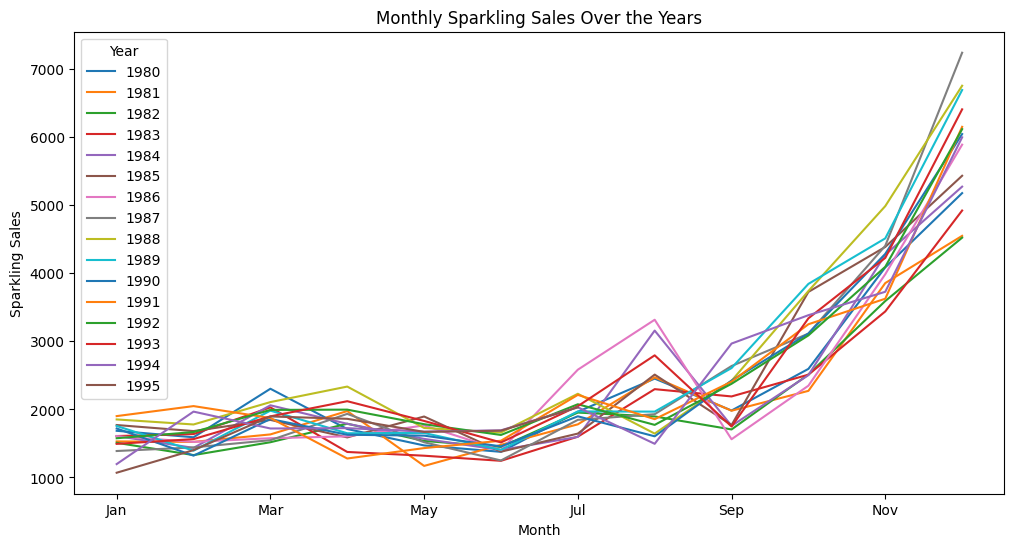

In [371]:
fig, ax = plt.subplots(figsize=(12, 6))  # Set figure size
monthly_sales_data.plot(ax=ax)  # Assign plot to the specified axes
plt.xlabel("Month")  # Label for x-axis
plt.ylabel("Sparkling Sales")  # Label for y-axis
plt.title("Monthly Sparkling Sales Over the Years")  # Title for the plot
plt.legend(title="Year")  # Add legend with a title
plt.show()

In [372]:
yearly_sales_data = pd.pivot_table(da, values = "Sparkling_Sales", columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


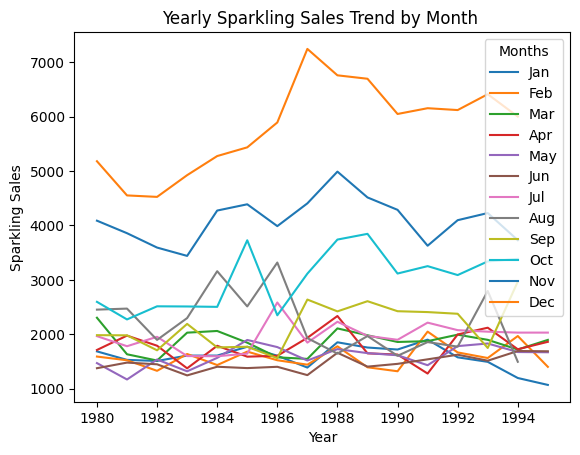

In [373]:
yearly_sales_data.plot()
plt.xlabel("Year")  # Label for x-axis
plt.ylabel("Sparkling Sales")  # Label for y-axis
plt.title("Yearly Sparkling Sales Trend by Month ")  # Title for the plot
plt.legend(title="Months")  # Add legend with a title
plt.show()

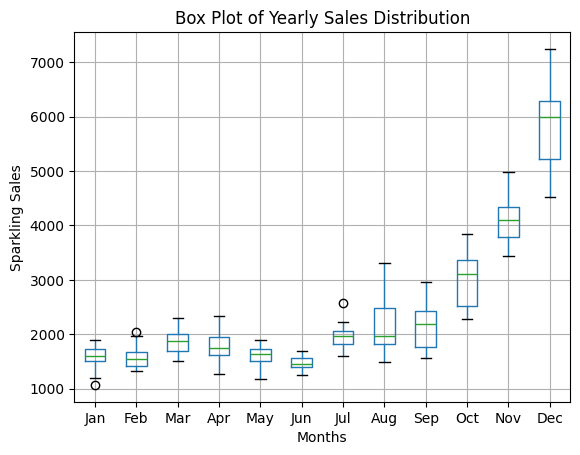

In [374]:
yearly_sales_data.boxplot()
plt.xlabel("Months")  # Label for x-axis
plt.ylabel("Sparkling Sales")  # Label for y-axis
plt.title("Box Plot of Yearly Sales Distribution")  # Title for the plot
plt.show()

In [375]:
#Time Series Decomposition

In [376]:
sales_spr = da["Sparkling_Sales"]

In [377]:
decomposition = sm.tsa.seasonal_decompose(sales_spr, model='multiplicative')

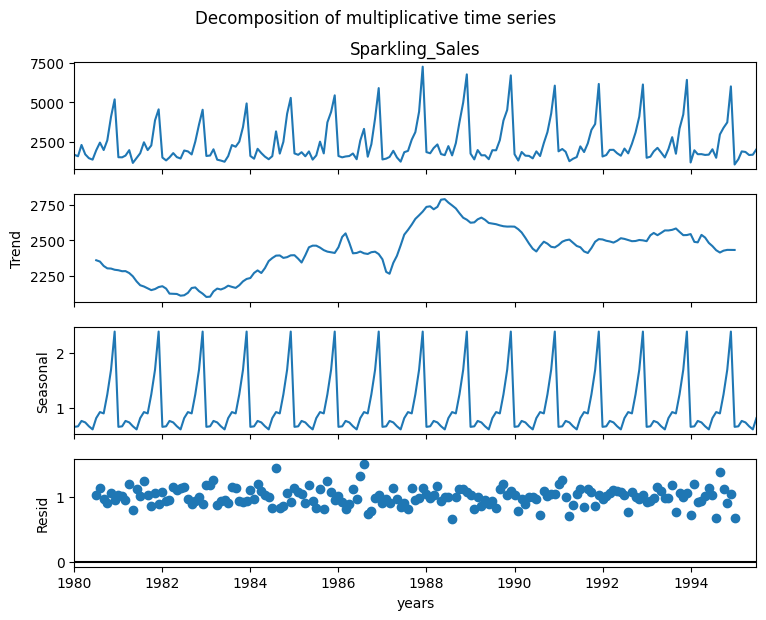

In [378]:
fig = decomposition.plot()
fig.set_figwidth(8)
fig.set_figheight(6)
fig.suptitle('Decomposition of multiplicative time series', y=1.01)
plt.xlabel("years")
plt.show()

In [379]:
print(da.isnull().sum())

Month              0
Year               0
Sparkling_Sales    0
dtype: int64


In [380]:
print(da.isnull().sum())  # Column-wise count of missing values
print(da.isnull().sum().sum())  # Total missing values in the dataset
print(da[da.isnull().any(axis=1)])  # Rows containing NaN values

Month              0
Year               0
Sparkling_Sales    0
dtype: int64
0
Empty DataFrame
Columns: [Month, Year, Sparkling_Sales]
Index: []


In [381]:
print(yearly_sales_data.isnull().sum())  # Column-wise missing values in pivot table
print(yearly_sales_data.isnull().sum().sum())  # Total missing values in pivot table
print(yearly_sales_data[yearly_sales_data.isnull().any(axis=1)])

Month
Jan    0
Feb    0
Mar    0
Apr    0
May    0
Jun    0
Jul    0
Aug    1
Sep    1
Oct    1
Nov    1
Dec    1
dtype: int64
5
Month     Jan     Feb     Mar     Apr     May     Jun     Jul  Aug  Sep  Oct  \
Year                                                                           
1995   1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0  NaN  NaN  NaN   

Month  Nov  Dec  
Year             
1995   NaN  NaN  


<Figure size 1200x600 with 0 Axes>

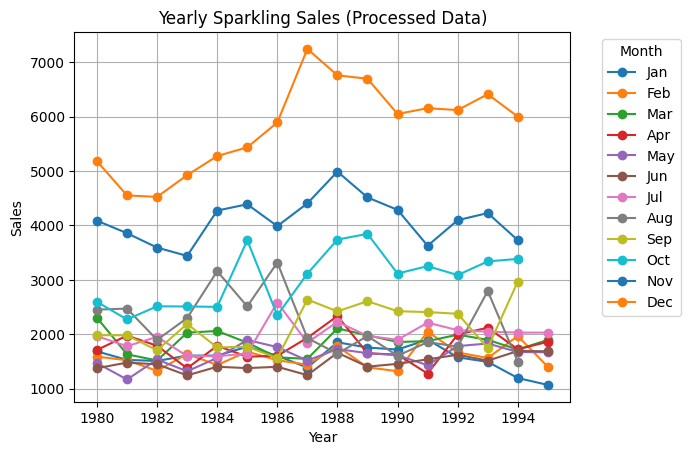

In [382]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
yearly_sales_data.plot(marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Yearly Sparkling Sales (Processed Data)")
plt.legend(title="Month", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


In [383]:
da['date'] = da.index
train = da[da.index < '1994-01-01']
test = da[da.index >= '1994-01-01']

In [384]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1980-01-01 to 1993-12-01
Freq: MS
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Month            168 non-null    object        
 1   Year             168 non-null    int32         
 2   Sparkling_Sales  168 non-null    int64         
 3   date             168 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 5.9+ KB


In [385]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19 entries, 1994-01-01 to 1995-07-01
Freq: MS
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Month            19 non-null     object        
 1   Year             19 non-null     int32         
 2   Sparkling_Sales  19 non-null     int64         
 3   date             19 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 684.0+ bytes


In [386]:
train.head()

,Month,Year,Sparkling_Sales,date
1980-01-01,Jan,1980,1686,1980-01-01
1980-02-01,Feb,1980,1591,1980-02-01
1980-03-01,Mar,1980,2304,1980-03-01
1980-04-01,Apr,1980,1712,1980-04-01
1980-05-01,May,1980,1471,1980-05-01


ConversionError: Failed to convert value(s) to axis units: '1994-01-01'

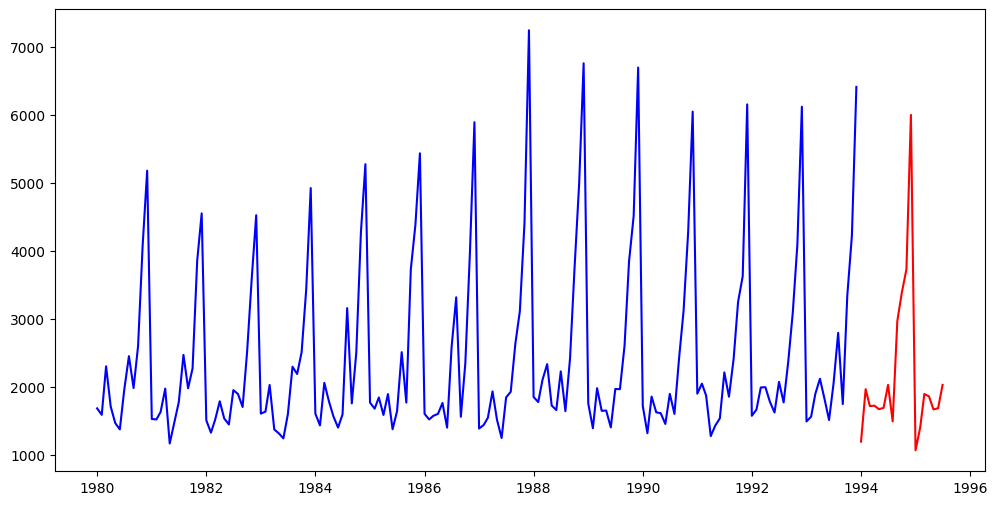

In [387]:
import matplotlib.pyplot as plt

# Plot the full dataset
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Sparkling_Sales'], label='Training Data', color='blue')
plt.plot(test.index, test['Sparkling_Sales'], label='Test Data', color='red')

# Formatting the plot
plt.axvline(x='1994-01-01', color='black', linestyle='--', label='Train-Test Split')  # Split line
plt.title('Train-Test Split Visualization')
plt.xlabel('Year')
plt.ylabel('Sparkling Sales')
plt.legend()
plt.show()


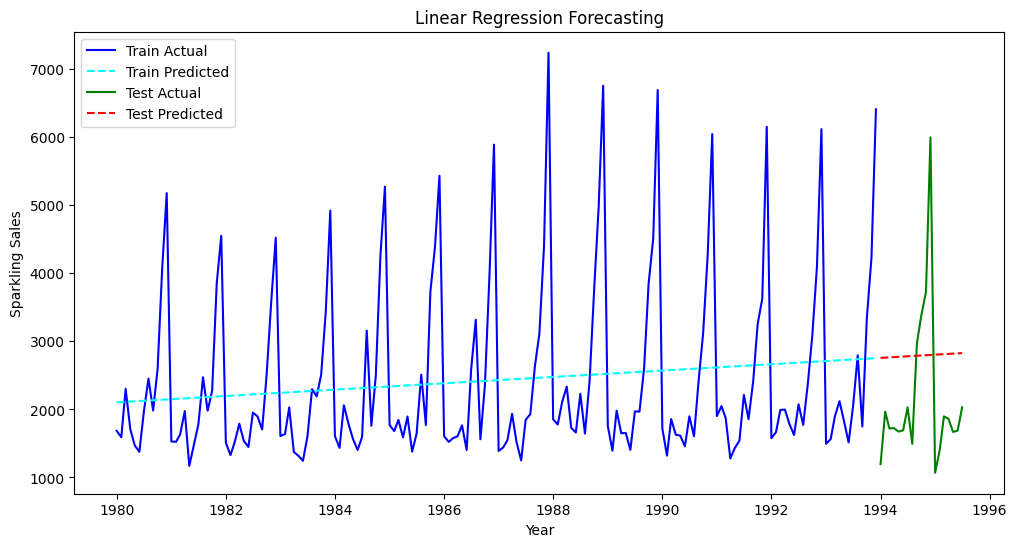

In [388]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Convert date index into a numerical feature
da['date_numeric'] = np.arange(len(da))

# Splitting into train and test (using previous split logic)
train = da[da.index < '1994-01-01']
test = da[da.index >= '1994-01-01']

# Define independent (X) and dependent (y) variables
X_train = train['date_numeric'].values.reshape(-1, 1)
y_train = train['Sparkling_Sales'].values

X_test = test['date_numeric'].values.reshape(-1, 1)
y_test = test['Sparkling_Sales'].values

# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict sales
train['lr_pred'] = lr_model.predict(X_train)
test['lr_pred'] = lr_model.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Sparkling_Sales'], label="Train Actual", color='blue')
plt.plot(train.index, train['lr_pred'], label="Train Predicted", linestyle="dashed", color='cyan')
plt.plot(test.index, test['Sparkling_Sales'], label="Test Actual", color='green')
plt.plot(test.index, test['lr_pred'], label="Test Predicted", linestyle="dashed", color='red')
plt.xlabel("Year")
plt.ylabel("Sparkling Sales")
plt.title("Linear Regression Forecasting")
plt.legend()
plt.show()


In [389]:
# Simple avg method

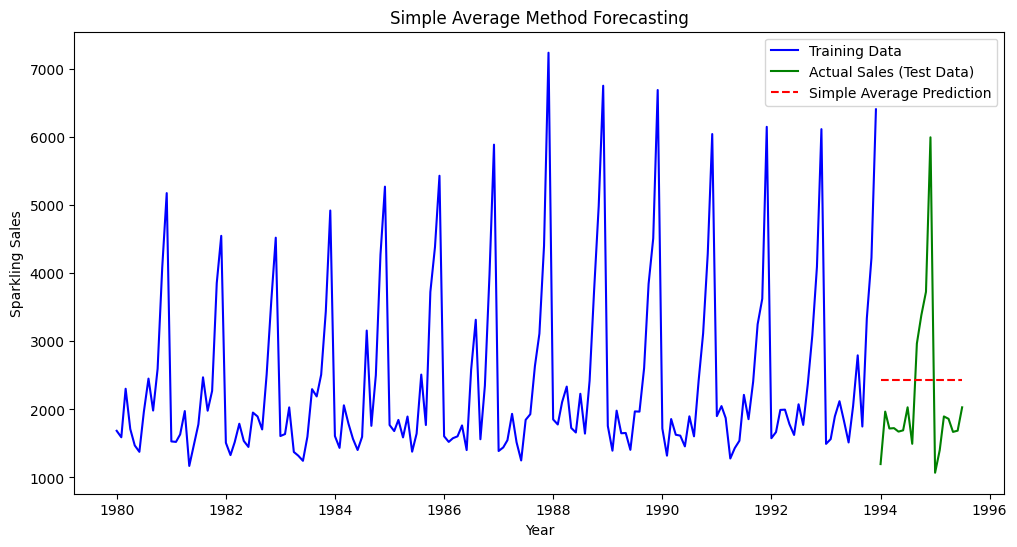

In [390]:
# Calculate the Simple Average from training data
simple_avg = train["Sparkling_Sales"].mean()

# Generate predictions for test data
test["Simple_Avg_Pred"] = simple_avg

# Plot Actual vs. Predicted Sales
plt.figure(figsize=(12, 6))
plt.plot(train.index, train["Sparkling_Sales"], label="Training Data", color="blue")
plt.plot(test.index, test["Sparkling_Sales"], label="Actual Sales (Test Data)", color="green")
plt.plot(test.index, test["Simple_Avg_Pred"], label="Simple Average Prediction", color="red", linestyle="dashed")

plt.xlabel("Year")
plt.ylabel("Sparkling Sales")
plt.title("Simple Average Method Forecasting")
plt.legend()
plt.show()

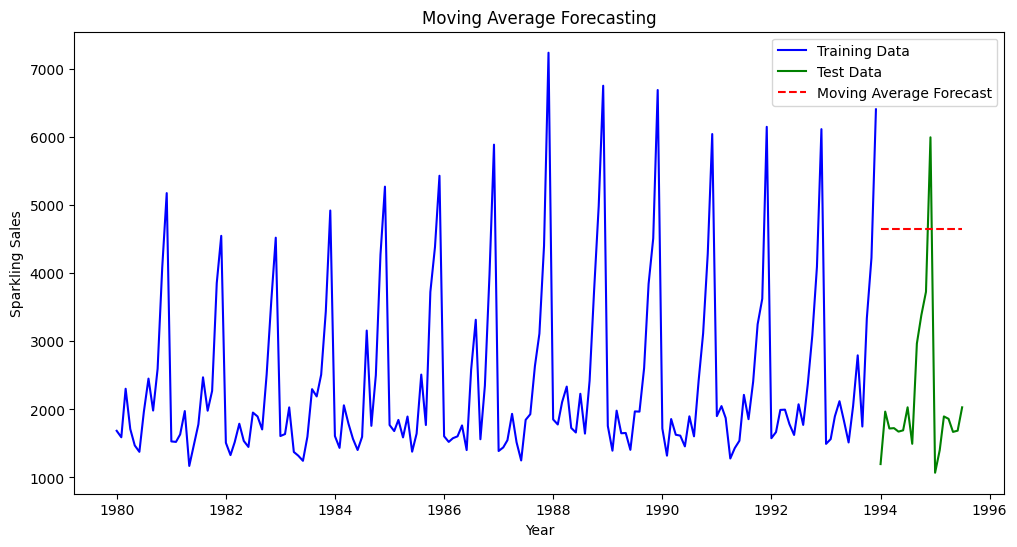

In [391]:
window_size = 3  # Adjust the window size as needed
train['Moving_Avg'] = train['Sparkling_Sales'].rolling(window=window_size).mean()

# Forecasting using the last moving average value
moving_avg_forecast = train['Moving_Avg'].iloc[-1]
test['Moving_Avg_Forecast'] = moving_avg_forecast

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Sparkling_Sales'], label='Training Data', color='blue')
plt.plot(test.index, test['Sparkling_Sales'], label='Test Data', color='green')
plt.plot(test.index, test['Moving_Avg_Forecast'], label='Moving Average Forecast', color='red', linestyle='dashed')

plt.xlabel('Year')
plt.ylabel('Sparkling Sales')
plt.title('Moving Average Forecasting')
plt.legend()
plt.show()


In [392]:
#simple exponential smoothing

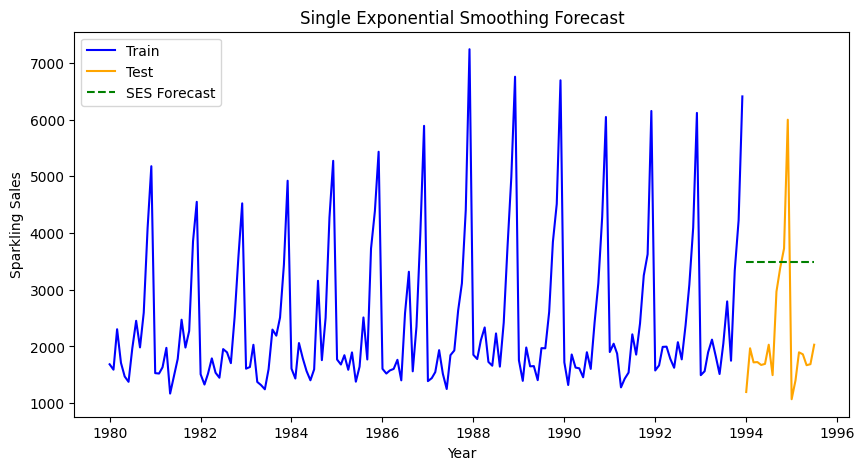

In [393]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Fit the Single Exponential Smoothing model
ses_model = SimpleExpSmoothing(train['Sparkling_Sales']).fit(smoothing_level=0.2, optimized=True)

# Generate predictions
ses_predictions = ses_model.forecast(len(test))

# Plot the results
plt.figure(figsize=(10,5))
plt.plot(train.index, train['Sparkling_Sales'], label='Train', color='blue')
plt.plot(test.index, test['Sparkling_Sales'], label='Test', color='orange')
plt.plot(test.index, ses_predictions, label='SES Forecast', color='green', linestyle='dashed')
plt.title('Single Exponential Smoothing Forecast')
plt.xlabel('Year')
plt.ylabel('Sparkling Sales')
plt.legend()
plt.show()

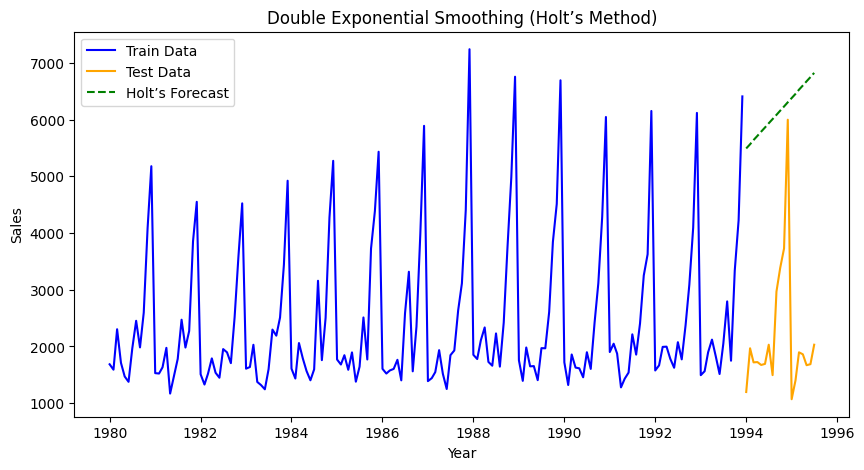

In [394]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Apply Double Exponential Smoothing (Holt’s Method)
holt_model = ExponentialSmoothing(train['Sparkling_Sales'], trend='add', seasonal=None, damped_trend=False).fit()

# Forecasting on test data
holt_forecast = holt_model.forecast(len(test))

# Plot results
plt.figure(figsize=(10,5))
plt.plot(train.index, train['Sparkling_Sales'], label='Train Data', color='blue')
plt.plot(test.index, test['Sparkling_Sales'], label='Test Data', color='orange')
plt.plot(test.index, holt_forecast, label='Holt’s Forecast', linestyle='dashed', color='green')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Double Exponential Smoothing (Holt’s Method)')
plt.legend()
plt.show()


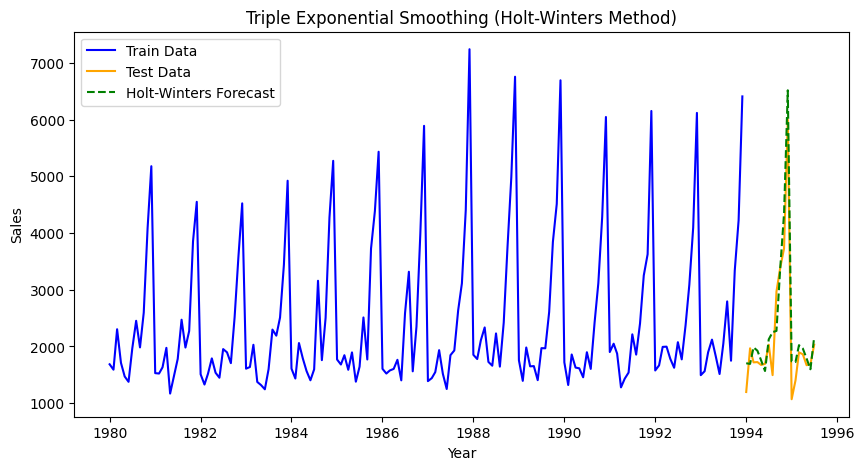

In [395]:
# Apply Triple Exponential Smoothing (Holt-Winters Method)
holt_winters_model = ExponentialSmoothing(
    train['Sparkling_Sales'],
    trend='add',
    seasonal='mul',
    seasonal_periods=12,
    damped_trend=False
).fit()

# Forecasting on test data
holt_winters_forecast = holt_winters_model.forecast(len(test))

# Plot results
plt.figure(figsize=(10,5))
plt.plot(train.index, train['Sparkling_Sales'], label='Train Data', color='blue')
plt.plot(test.index, test['Sparkling_Sales'], label='Test Data', color='orange')
plt.plot(test.index, holt_winters_forecast, label='Holt-Winters Forecast', linestyle='dashed', color='green')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Triple Exponential Smoothing (Holt-Winters Method)')
plt.legend()
plt.show()


In [396]:
from sklearn.metrics import mean_squared_error

# Calculate MSE for each model
mse_lr = mean_squared_error(test['Sparkling_Sales'], test['lr_pred'])  # FIXED
mse_sa = mean_squared_error(test['Sparkling_Sales'], test['Simple_Avg_Pred'])
mse_ma = mean_squared_error(test['Sparkling_Sales'], test['Moving_Avg_Forecast'])
mse_ses = mean_squared_error(test['Sparkling_Sales'], ses_predictions)
mse_holt = mean_squared_error(test['Sparkling_Sales'], holt_forecast)
mse_hw = mean_squared_error(test['Sparkling_Sales'], holt_winters_forecast)

# Display results
mse_results = pd.DataFrame({
    "Model": ["Linear Regression", "Simple Average", "Moving Average",
              "Simple Exponential Smoothing", "Holt’s Method", "Holt-Winters Method"],
    "MSE": [mse_lr, mse_sa, mse_ma, mse_ses, mse_holt, mse_hw]
})

print(mse_results.sort_values(by="MSE"))


                          Model           MSE
5           Holt-Winters Method  1.472794e+05
1                Simple Average  1.331513e+06
0             Linear Regression  1.648571e+06
3  Simple Exponential Smoothing  3.028854e+06
2                Moving Average  7.464071e+06
4                 Holt’s Method  1.724700e+07


Augmented Dickey-Fuller Test Results:
ADF Statistic: -1.3604974548123345
p-value: 0.6010608871634866
Critical Values:
	1%: -3.4682803641749267
	5%: -2.8782017240816327
	10%: -2.5756525795918366
Conclusion: The data is non-stationary (fail to reject null hypothesis).


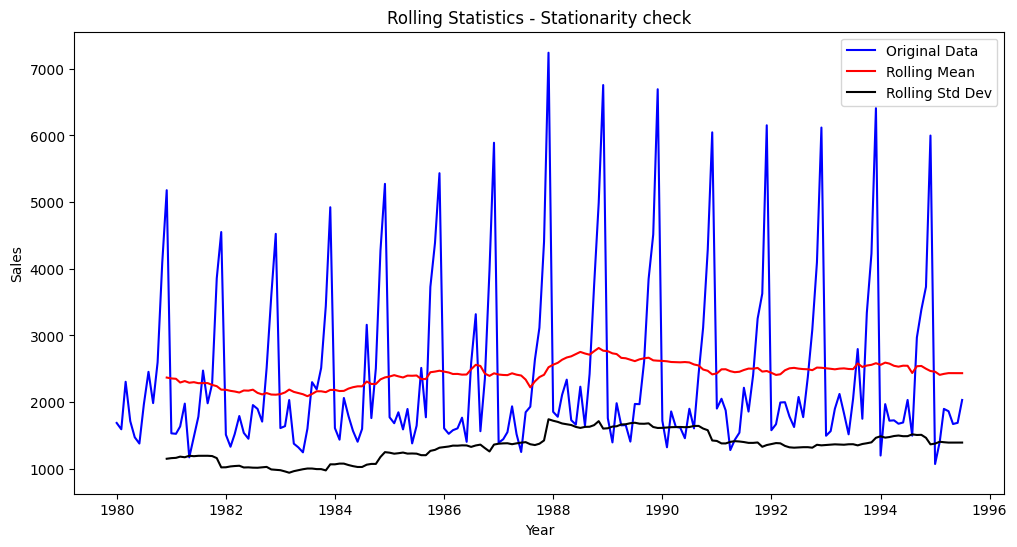

In [397]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller Test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print("Augmented Dickey-Fuller Test Results:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value}")
    if result[1] <= 0.05:
        print("Conclusion: The data is stationary (reject null hypothesis).")
    else:
        print("Conclusion: The data is non-stationary (fail to reject null hypothesis).")

# Apply ADF test on the original data
adf_test(da['Sparkling_Sales'])

# Rolling Mean and Standard Deviation
plt.figure(figsize=(12,6))
rolling_mean = da['Sparkling_Sales'].rolling(window=12).mean()
rolling_std = da['Sparkling_Sales'].rolling(window=12).std()

plt.plot(da['Sparkling_Sales'], label="Original Data", color="blue")
plt.plot(rolling_mean, label="Rolling Mean", color="red")
plt.plot(rolling_std, label="Rolling Std Dev", color="black")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Rolling Statistics - Stationarity check")
plt.legend()
plt.show()


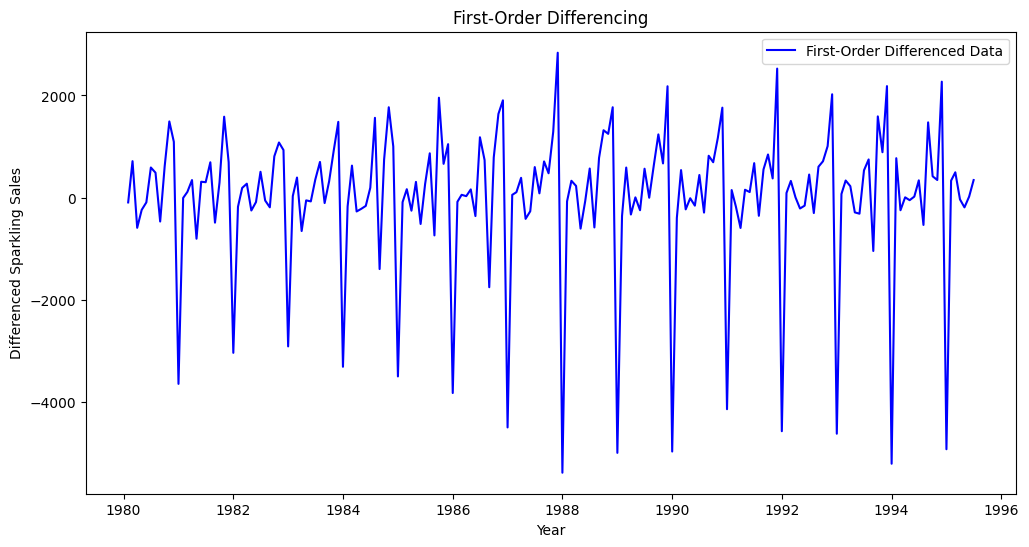

ADF Test Results after First-Order Differencing:
Test Statistic: -45.05030093619526
P-Value: 0.0
Critical Values: {'1%': -3.4682803641749267, '5%': -2.8782017240816327, '10%': -2.5756525795918366}


In [398]:
# Apply first-order differencing
da['Sales_Diff'] = da['Sparkling_Sales'].diff()

# Drop NA values resulting from differencing
da.dropna(inplace=True)

# Plot the differenced data
plt.figure(figsize=(12, 6))
plt.plot(da.index, da['Sales_Diff'], color='blue', label='First-Order Differenced Data')
plt.xlabel('Year')
plt.ylabel('Differenced Sparkling Sales')
plt.title('First-Order Differencing')
plt.legend()
plt.show()

# Perform ADF Test again
adf_test = adfuller(da['Sales_Diff'].dropna())
print("ADF Test Results after First-Order Differencing:")
print(f"Test Statistic: {adf_test[0]}")
print(f"P-Value: {adf_test[1]}")
print(f"Critical Values: {adf_test[4]}")


In [399]:
# ACF plot and Pacf

<Figure size 600x400 with 0 Axes>

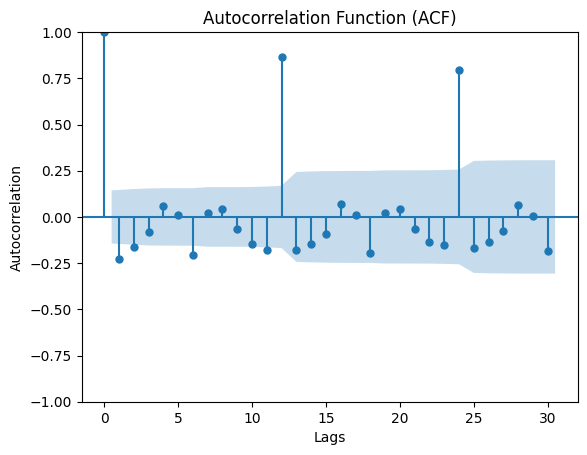

In [400]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF
plt.figure(figsize=(6, 4))
plot_acf(da['Sales_Diff'].dropna(), lags=30)
plt.title("Autocorrelation Function (ACF)")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()


<Figure size 600x400 with 0 Axes>

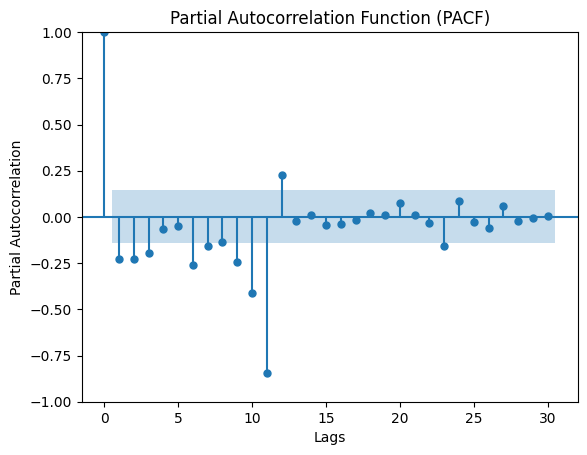

In [401]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot PACF
plt.figure(figsize=(6, 4))
plot_pacf(da['Sales_Diff'].dropna(), lags=30)
plt.title("Partial Autocorrelation Function (PACF)")
plt.xlabel("Lags")
plt.ylabel("Partial Autocorrelation")
plt.show()


In [402]:
!pip install pmdarima


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.63 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3473.424, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3229.375, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3350.190, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3226.178, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=3221.748, Time=0.05 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=3218.485, Time=0.09 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=3220.134, Time=0.09 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.88 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=5.12 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=3221.768, Time=0.63 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=3172.328, Time=0.18 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3171.863, Time=0.31 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3171.566, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3172.8

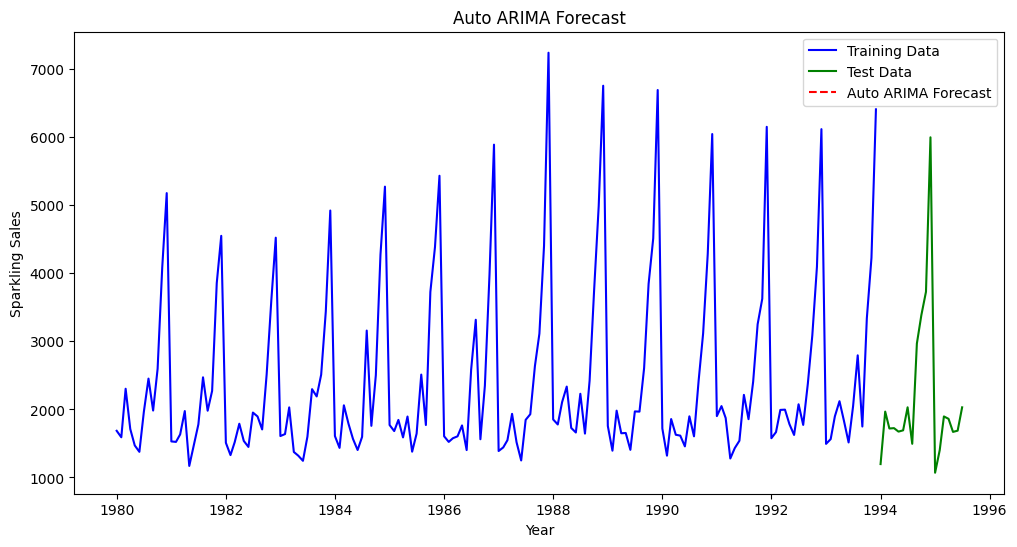

In [403]:
from pmdarima import auto_arima

# Fit Auto ARIMA model
auto_arima_model = auto_arima(da['Sparkling_Sales'], seasonal=False, stepwise=True, trace=True)

# Print the best ARIMA order (p, d, q)
print(f"Optimal ARIMA Order: {auto_arima_model.order}")

# Forecast using Auto ARIMA
forecast_auto_arima = auto_arima_model.predict(n_periods=len(test))

# Add forecasted values to test data
test['Auto_ARIMA_Forecast'] = forecast_auto_arima

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Sparkling_Sales'], label="Training Data", color="blue")
plt.plot(test.index, test['Sparkling_Sales'], label="Test Data", color="green")
plt.plot(test.index, test['Auto_ARIMA_Forecast'], label="Auto ARIMA Forecast", color="red", linestyle="dashed")
plt.xlabel("Year")
plt.ylabel("Sparkling Sales")
plt.title("Auto ARIMA Forecast")
plt.legend()
plt.show()


In [404]:
print(len(forecast_auto_arima))  # Should be 19
print(len(test))  # Should also be 19

19
19


In [405]:
test['Auto_ARIMA_Forecast'] = pd.Series(forecast_auto_arima, index=test.index)


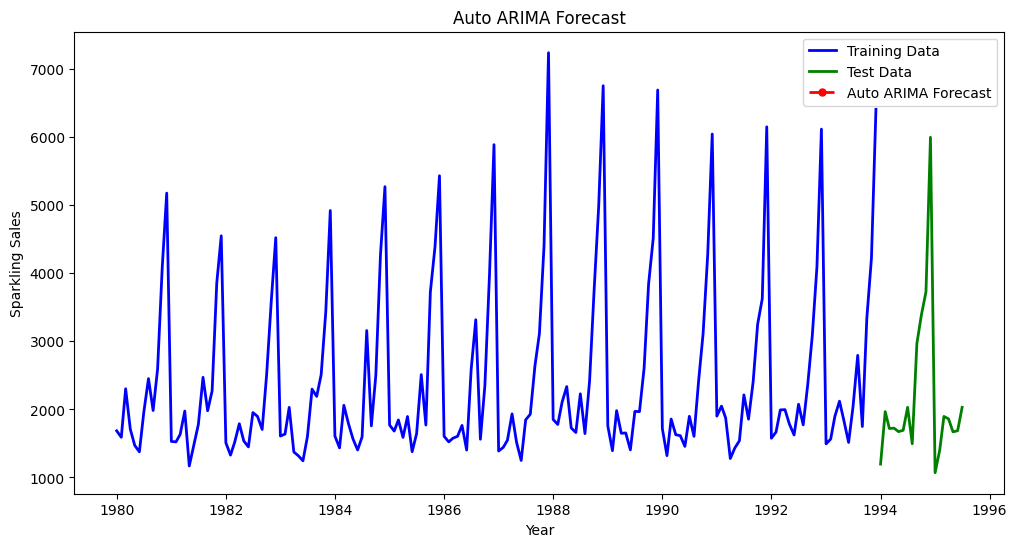

In [406]:
plt.figure(figsize=(12, 6))

# Plot Training Data
plt.plot(train.index, train['Sparkling_Sales'], label="Training Data", color="blue", linewidth=2)

# Plot Test Data
plt.plot(test.index, test['Sparkling_Sales'], label="Test Data", color="green", linewidth=2)

# Plot Auto ARIMA Forecast with proper formatting
plt.plot(test.index, test['Auto_ARIMA_Forecast'], label="Auto ARIMA Forecast",
         color="red", linestyle="dashed", linewidth=2, marker='o', markersize=5)

# Labels and Title
plt.xlabel("Year")
plt.ylabel("Sparkling Sales")
plt.title("Auto ARIMA Forecast")

# Display Legend
plt.legend()
plt.show()


In [407]:
print(test['Auto_ARIMA_Forecast'].isnull().sum())  # Should be 0



19


In [408]:
print(type(forecast_auto_arima))
print(forecast_auto_arima.shape)
print(forecast_auto_arima)

<class 'pandas.core.series.Series'>
(19,)
1995-08-01    2345.290837
1995-09-01    2429.724243
1995-10-01    2423.173086
1995-11-01    2409.360932
1995-12-01    2404.528759
1996-01-01    2404.354275
1996-02-01    2404.918249
1996-03-01    2405.173719
1996-04-01    2405.204822
1996-05-01    2405.184026
1996-06-01    2405.171359
1996-07-01    2405.168874
1996-08-01    2405.169516
1996-09-01    2405.170108
1996-10-01    2405.170267
1996-11-01    2405.170255
1996-12-01    2405.170229
1997-01-01    2405.170220
1997-02-01    2405.170220
Freq: MS, dtype: float64


In [409]:
test['Auto_ARIMA_Forecast'] = pd.Series(forecast_auto_arima.values, index=test.index)

# Verify if null values are still present
print(test['Auto_ARIMA_Forecast'].isnull().sum())  # Should be 0


0


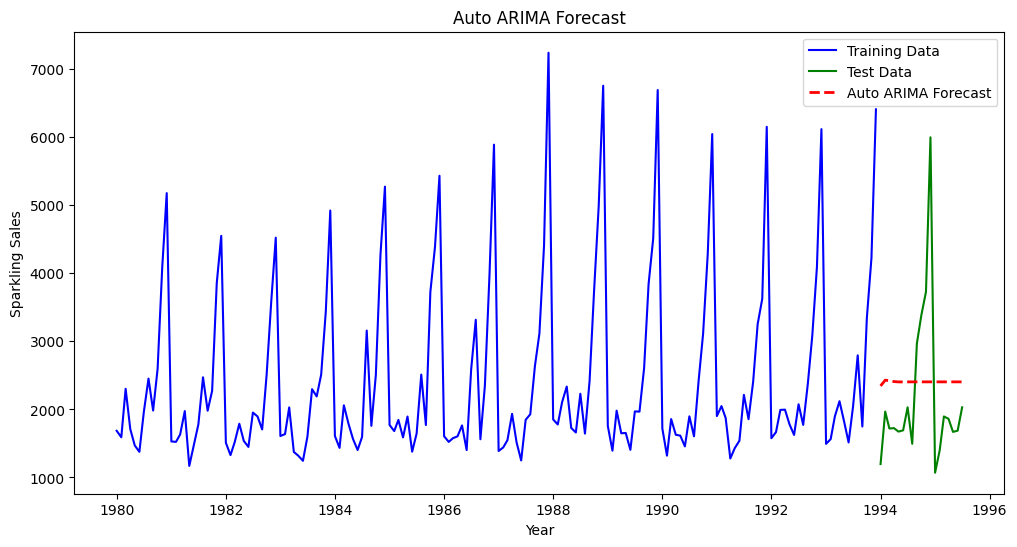

In [410]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Sparkling_Sales'], label="Training Data", color="blue")
plt.plot(test.index, test['Sparkling_Sales'], label="Test Data", color="green")
plt.plot(test.index, test['Auto_ARIMA_Forecast'], label="Auto ARIMA Forecast",
         color="red", linestyle="dashed", linewidth=2)
plt.xlabel("Year")
plt.ylabel("Sparkling Sales")
plt.title("Auto ARIMA Forecast")
plt.legend()
plt.show()


In [411]:

print(test[['Sparkling_Sales', 'Auto_ARIMA_Forecast']].head(10))  # Check first 10 rows


            Sparkling_Sales  Auto_ARIMA_Forecast
1994-01-01             1197          2345.290837
1994-02-01             1968          2429.724243
1994-03-01             1720          2423.173086
1994-04-01             1725          2409.360932
1994-05-01             1674          2404.528759
1994-06-01             1693          2404.354275
1994-07-01             2031          2404.918249
1994-08-01             1495          2405.173719
1994-09-01             2968          2405.204822
1994-10-01             3385          2405.184026


In [412]:
print(auto_arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  186
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1581.783
Date:                Sat, 08 Mar 2025   AIC                           3171.566
Time:                        08:29:31   BIC                           3184.469
Sample:                    02-01-1980   HQIC                          3176.795
                         - 07-01-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1730.1150    333.920      5.181      0.000    1075.643    2384.587
ar.L1          0.4123      0.123      3.350      0.001       0.171       0.653
ar.L2         -0.1316      0.186     -0.707      0.4

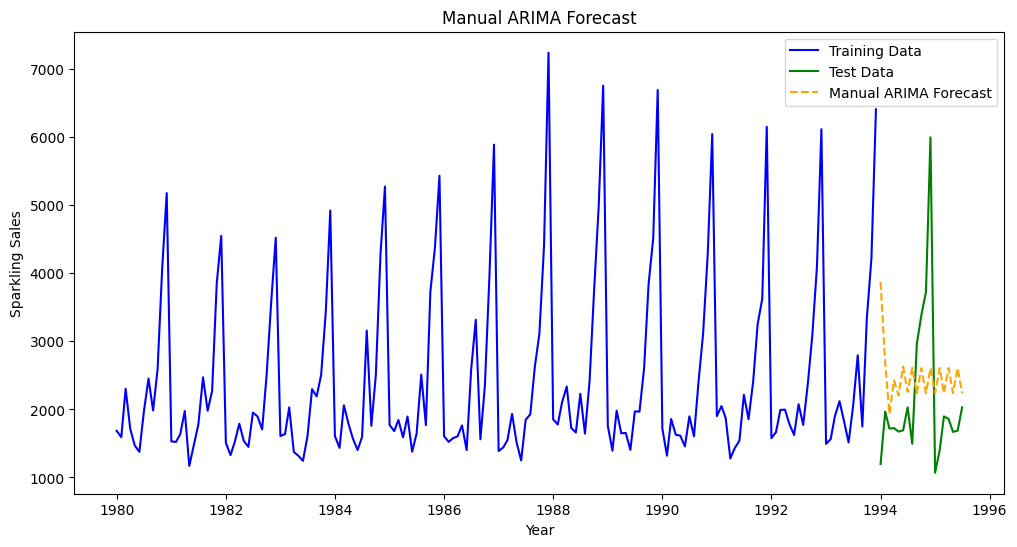

In [413]:
from statsmodels.tsa.arima.model import ARIMA

# Define ARIMA order based on ACF & PACF analysis
p, d, q = 3, 1, 2  # Update these values based on your ACF & PACF results

# Fit ARIMA model
manual_arima_model = ARIMA(train['Sparkling_Sales'], order=(p, d, q))
manual_arima_result = manual_arima_model.fit()

# Forecast using Manual ARIMA
forecast_manual_arima = manual_arima_result.forecast(steps=len(test))

# Add forecasted values to test data
test['Manual_ARIMA_Forecast'] = forecast_manual_arima

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Sparkling_Sales'], label="Training Data", color="blue")
plt.plot(test.index, test['Sparkling_Sales'], label="Test Data", color="green")
plt.plot(test.index, test['Manual_ARIMA_Forecast'], label="Manual ARIMA Forecast", color="orange", linestyle="dashed")
plt.xlabel("Year")
plt.ylabel("Sparkling Sales")
plt.title("Manual ARIMA Forecast")
plt.legend()
plt.show()


In [414]:
#sarnma

In [415]:
train.head()

,Month,Year,Sparkling_Sales,date,date_numeric,lr_pred,Moving_Avg
1980-01-01,Jan,1980,1686,1980-01-01,0,2103.920541,NaN
1980-02-01,Feb,1980,1591,1980-02-01,1,2107.811997,NaN
1980-03-01,Mar,1980,2304,1980-03-01,2,2111.703454,1860.333333
1980-04-01,Apr,1980,1712,1980-04-01,3,2115.594910,1869.000000
1980-05-01,May,1980,1471,1980-05-01,4,2119.486366,1829.000000


In [416]:
print(train.index.dtype)

datetime64[ns]


In [417]:

print(train.dtypes)


Month                      object
Year                        int32
Sparkling_Sales             int64
date               datetime64[ns]
date_numeric                int64
lr_pred                   float64
Moving_Avg                float64
dtype: object


In [418]:
train.head()

,Month,Year,Sparkling_Sales,date,date_numeric,lr_pred,Moving_Avg
1980-01-01,Jan,1980,1686,1980-01-01,0,2103.920541,NaN
1980-02-01,Feb,1980,1591,1980-02-01,1,2107.811997,NaN
1980-03-01,Mar,1980,2304,1980-03-01,2,2111.703454,1860.333333
1980-04-01,Apr,1980,1712,1980-04-01,3,2115.594910,1869.000000
1980-05-01,May,1980,1471,1980-05-01,4,2119.486366,1829.000000


In [419]:
train['Sales_Diff'] = train['Sparkling_Sales'].diff()

In [420]:
train1 = train[['Sales_Diff']]  # Keep only the numeric time series column


In [421]:
train1.head()

,Sales_Diff
1980-01-01,NaN
1980-02-01,-95.0
1980-03-01,713.0
1980-04-01,-592.0
1980-05-01,-241.0


In [422]:
train1 = train1.fillna(0)

In [423]:
train1.head()

,Sales_Diff
1980-01-01,0.0
1980-02-01,-95.0
1980-03-01,713.0
1980-04-01,-592.0
1980-05-01,-241.0


In [424]:
test['Sales_Diff'] = test['Sparkling_Sales'].diff()

In [425]:
test1 = test[['Sales_Diff']]

In [426]:
test1.head()

,Sales_Diff
1994-01-01,NaN
1994-02-01,771.0
1994-03-01,-248.0
1994-04-01,5.0
1994-05-01,-51.0


In [427]:
test1 = test.fillna(0)

In [428]:
test1.head()

,Month,Year,Sparkling_Sales,date,date_numeric,lr_pred,Simple_Avg_Pred,Moving_Avg_Forecast,Auto_ARIMA_Forecast,Manual_ARIMA_Forecast,Sales_Diff
1994-01-01,Jan,1994,1197,1994-01-01,168,2757.685201,2428.857143,4658.666667,2345.290837,3872.636158,0.0
1994-02-01,Feb,1994,1968,1994-02-01,169,2761.576657,2428.857143,4658.666667,2429.724243,2686.884097,771.0
1994-03-01,Mar,1994,1720,1994-03-01,170,2765.468114,2428.857143,4658.666667,2423.173086,1935.560137,-248.0
1994-04-01,Apr,1994,1725,1994-04-01,171,2769.359570,2428.857143,4658.666667,2409.360932,2428.032768,5.0
1994-05-01,May,1994,1674,1994-05-01,172,2773.251026,2428.857143,4658.666667,2404.528759,2205.652741,-51.0


In [429]:
from pmdarima import auto_arima

# Run Auto SARIMA
auto_sarima_model = auto_arima(train1, seasonal=True, m=12, stepwise=True, suppress_warnings=True)
print(auto_sarima_model.summary())


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  168
Model:             SARIMAX(2, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -1180.834
Date:                            Sat, 08 Mar 2025   AIC                           2371.667
Time:                                    08:32:15   BIC                           2386.917
Sample:                                01-01-1980   HQIC                          2377.861
                                     - 12-01-1993                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2017      0.068      2.971      0.003       0.069       0.335
ar.L2         -0.0535      0.067   

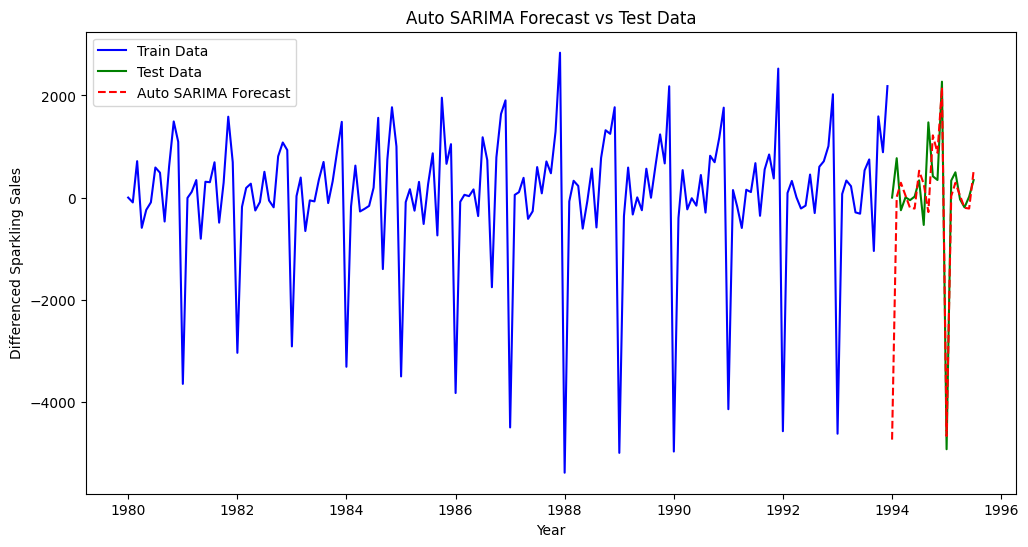

In [430]:
# Forecast using Auto SARIMA
n_forecast = len(test1)  # Forecast for the length of the test data
auto_sarima_forecast = auto_sarima_model.predict(n_periods=n_forecast)

# Create date index for forecast
forecast_index = test1.index  # Using test data index for alignment

# Plot the forecast along with train and test data
plt.figure(figsize=(12, 6))
plt.plot(train1.index, train1['Sales_Diff'], label='Train Data', color='blue')
plt.plot(test1.index, test1['Sales_Diff'], label='Test Data', color='green')
plt.plot(forecast_index, auto_sarima_forecast, label='Auto SARIMA Forecast', color='red', linestyle='dashed')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Differenced Sparkling Sales')
plt.title('Auto SARIMA Forecast vs Test Data')
plt.legend()
plt.show()


In [431]:
# manual sarima

In [432]:
print(type(test1))
print(test1.shape)

<class 'pandas.core.frame.DataFrame'>
(19, 11)


In [433]:
da['Seasonal_Diff'] = da['Sparkling_Sales'] - da['Sparkling_Sales'].shift(12)


In [434]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(da['Sparkling_Sales'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] < 0.05:
    print("The data is stationary after seasonal differencing (D=1).")
else:
    print("The data is still non-stationary; consider D=2.")


ADF Statistic: -1.3753192916330668
p-value: 0.5940495125224297
The data is still non-stationary; consider D=2.


In [435]:
da['Seasonal_Diff2'] = da['Seasonal_Diff'] - da['Seasonal_Diff'].shift(12)


In [436]:
result2 = adfuller(da['Seasonal_Diff2'].dropna())
print(f'ADF Statistic: {result2[0]}')
print(f'p-value: {result2[1]}')

if result2[1] < 0.05:
    print("The data is now stationary after applying D=2.")
else:
    print("The data is still non-stationary, consider further differencing.")


ADF Statistic: -4.854954579967584
p-value: 4.2643205842177435e-05
The data is now stationary after applying D=2.


In [437]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define & fit the Manual SARIMA model with your chosen (p, d, q) and (P, D, Q, s)
manual_sarima_model = SARIMAX(train1['Sales_Diff'],
                              order=(3,1,2),  # (p, d, q)
                              seasonal_order=(2,2,2,12),  # (P, D, Q, s)
                              enforce_stationarity=False,
                              enforce_invertibility=False)

manual_sarima_result = manual_sarima_model.fit()  # Fit the model


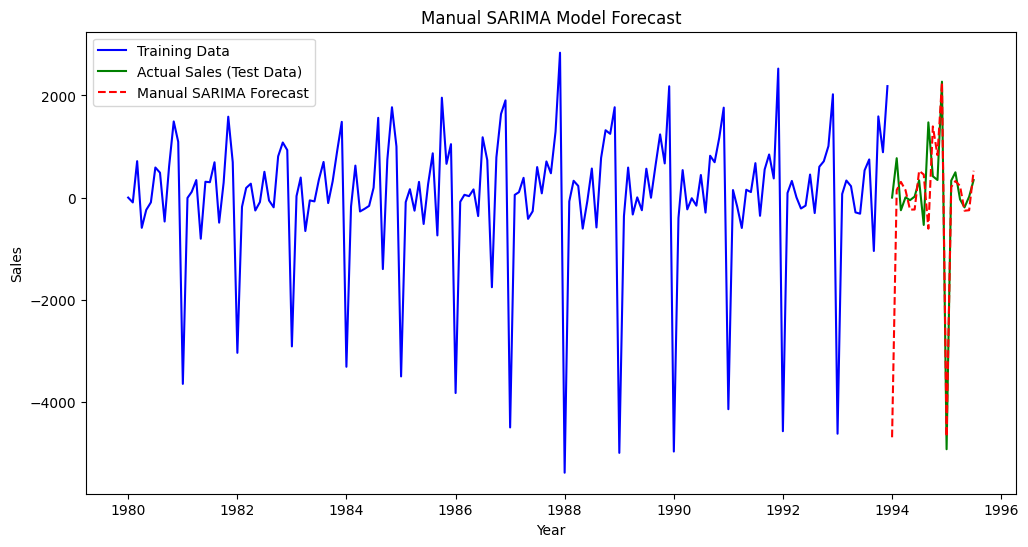

In [438]:
# Forecast using the Manual SARIMA model
n_forecast = len(test1)  # Number of periods to forecast
manual_sarima_pred = manual_sarima_result.forecast(steps=n_forecast)  # Use fitted model for forecasting
manual_sarima_pred = pd.Series(manual_sarima_pred, index=test1.index)  # Align with test data index

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train1.index, train1, label="Training Data", color="blue")
plt.plot(test1.index, test1['Sales_Diff'], label="Actual Sales (Test Data)", color="green")
plt.plot(test1.index, manual_sarima_pred, label="Manual SARIMA Forecast", color="red", linestyle="dashed")

# Labels & title
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Manual SARIMA Model Forecast")
plt.legend()
plt.show()


In [439]:
test

,Month,Year,Sparkling_Sales,date,date_numeric,lr_pred,Simple_Avg_Pred,Moving_Avg_Forecast,Auto_ARIMA_Forecast,Manual_ARIMA_Forecast,Sales_Diff
1994-01-01,Jan,1994,1197,1994-01-01,168,2757.685201,2428.857143,4658.666667,2345.290837,3872.636158,NaN
1994-02-01,Feb,1994,1968,1994-02-01,169,2761.576657,2428.857143,4658.666667,2429.724243,2686.884097,771.0
1994-03-01,Mar,1994,1720,1994-03-01,170,2765.468114,2428.857143,4658.666667,2423.173086,1935.560137,-248.0
1994-04-01,Apr,1994,1725,1994-04-01,171,2769.359570,2428.857143,4658.666667,2409.360932,2428.032768,5.0
1994-05-01,May,1994,1674,1994-05-01,172,2773.251026,2428.857143,4658.666667,2404.528759,2205.652741,-51.0
1994-06-01,Jun,1994,1693,1994-06-01,173,2777.142483,2428.857143,4658.666667,2404.354275,2628.784463,19.0
1994-07-01,Jul,1994,2031,1994-07-01,174,2781.033939,2428.857143,4658.666667,2404.918249,2256.979427,338.0
1994-08-01,Aug,1994,1495,1994-08-01,175,2784.925395,2428.857143,4658.666667,2405.173719,2614.033631,-536.0
1994-09-01,Sep,1994,2968,1994-09-01,176,2788.816852,2428.857143,4658.666667,2405.204822,2238.144363,1473.0
1994-10-01,Oct,1994,3385,1994-10-01,177,2792.708308,2428.857143,4658.666667,2405.184026,2606.976626,417.0


In [440]:
print(test.columns)

Index(['Month', 'Year', 'Sparkling_Sales', 'date', 'date_numeric', 'lr_pred',
       'Simple_Avg_Pred', 'Moving_Avg_Forecast', 'Auto_ARIMA_Forecast',
       'Manual_ARIMA_Forecast', 'Sales_Diff'],
      dtype='object')


In [441]:
[var for var in vars() if 'sarima' in var.lower()]

['auto_sarima_model',
 'auto_sarima_forecast',
 'SARIMAX',
 'manual_sarima_model',
 'manual_sarima_result',
 'manual_sarima_pred',
 'rmse_auto_sarima']

In [442]:
test1

,Month,Year,Sparkling_Sales,date,date_numeric,lr_pred,Simple_Avg_Pred,Moving_Avg_Forecast,Auto_ARIMA_Forecast,Manual_ARIMA_Forecast,Sales_Diff
1994-01-01,Jan,1994,1197,1994-01-01,168,2757.685201,2428.857143,4658.666667,2345.290837,3872.636158,0.0
1994-02-01,Feb,1994,1968,1994-02-01,169,2761.576657,2428.857143,4658.666667,2429.724243,2686.884097,771.0
1994-03-01,Mar,1994,1720,1994-03-01,170,2765.468114,2428.857143,4658.666667,2423.173086,1935.560137,-248.0
1994-04-01,Apr,1994,1725,1994-04-01,171,2769.359570,2428.857143,4658.666667,2409.360932,2428.032768,5.0
1994-05-01,May,1994,1674,1994-05-01,172,2773.251026,2428.857143,4658.666667,2404.528759,2205.652741,-51.0
1994-06-01,Jun,1994,1693,1994-06-01,173,2777.142483,2428.857143,4658.666667,2404.354275,2628.784463,19.0
1994-07-01,Jul,1994,2031,1994-07-01,174,2781.033939,2428.857143,4658.666667,2404.918249,2256.979427,338.0
1994-08-01,Aug,1994,1495,1994-08-01,175,2784.925395,2428.857143,4658.666667,2405.173719,2614.033631,-536.0
1994-09-01,Sep,1994,2968,1994-09-01,176,2788.816852,2428.857143,4658.666667,2405.204822,2238.144363,1473.0
1994-10-01,Oct,1994,3385,1994-10-01,177,2792.708308,2428.857143,4658.666667,2405.184026,2606.976626,417.0


In [443]:
# comparing the model performance

In [444]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE for each model
rmse_lr = np.sqrt(mean_squared_error(test['Sparkling_Sales'], test['lr_pred']))
rmse_sa = np.sqrt(mean_squared_error(test['Sparkling_Sales'], test['Simple_Avg_Pred']))
rmse_ma = np.sqrt(mean_squared_error(test['Sparkling_Sales'], test['Moving_Avg_Forecast']))
rmse_ses = np.sqrt(mean_squared_error(test['Sparkling_Sales'], ses_predictions))
rmse_holt = np.sqrt(mean_squared_error(test['Sparkling_Sales'], holt_forecast))
rmse_hw = np.sqrt(mean_squared_error(test['Sparkling_Sales'], holt_winters_forecast))

# Store results in DataFrame
rmse_results = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Simple Average",
        "Moving Average",
        "Simple Exponential Smoothing",
        "Holt’s Method",
        "Holt-Winters Method"
    ],
    "RMSE": [rmse_lr, rmse_sa, rmse_ma, rmse_ses, rmse_holt, rmse_hw]
})

# Display sorted results
print(rmse_results.sort_values(by="RMSE"))


                          Model         RMSE
5           Holt-Winters Method   383.769990
1                Simple Average  1153.912246
0             Linear Regression  1283.966952
3  Simple Exponential Smoothing  1740.360191
2                Moving Average  2732.045180
4                 Holt’s Method  4152.951126


In [445]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE for Exponential Smoothing and Baseline Models
rmse_lr = np.sqrt(mean_squared_error(test['Sparkling_Sales'], test['lr_pred']))
rmse_sa = np.sqrt(mean_squared_error(test['Sparkling_Sales'], test['Simple_Avg_Pred']))
rmse_ma = np.sqrt(mean_squared_error(test['Sparkling_Sales'], test['Moving_Avg_Forecast']))
rmse_ses = np.sqrt(mean_squared_error(test['Sparkling_Sales'], ses_predictions))
rmse_holt = np.sqrt(mean_squared_error(test['Sparkling_Sales'], holt_forecast))
rmse_hw = np.sqrt(mean_squared_error(test['Sparkling_Sales'], holt_winters_forecast))

# Calculate RMSE for ARIMA & SARIMA Models
rmse_auto_arima = np.sqrt(mean_squared_error(test1['Sales_Diff'], test1['Auto_ARIMA_Forecast']))
rmse_manual_arima = np.sqrt(mean_squared_error(test1['Sales_Diff'], test1['Manual_ARIMA_Forecast']))
rmse_auto_sarima = np.sqrt(mean_squared_error(test1['Sales_Diff'], auto_sarima_forecast))
rmse_manual_sarima = np.sqrt(mean_squared_error(test1['Sales_Diff'], manual_sarima_pred))

# Store results in DataFrame
rmse_results = pd.DataFrame({
    "Model": [
        "Linear Regression", "Simple Average", "Moving Average",
        "Simple Exponential Smoothing", "Holt’s Method", "Holt-Winters Method",
        "Auto ARIMA", "Manual ARIMA", "Auto SARIMA", "Manual SARIMA"
    ],
    "RMSE": [
        rmse_lr, rmse_sa, rmse_ma, rmse_ses, rmse_holt, rmse_hw,
        rmse_auto_arima, rmse_manual_arima, rmse_auto_sarima, rmse_manual_sarima
    ]
})

# Display sorted results
print(rmse_results.sort_values(by="RMSE"))


                          Model         RMSE
5           Holt-Winters Method   383.769990
1                Simple Average  1153.912246
8                   Auto SARIMA  1222.916111
9                 Manual SARIMA  1249.773878
0             Linear Regression  1283.966952
3  Simple Exponential Smoothing  1740.360191
6                    Auto ARIMA  2707.555912
2                Moving Average  2732.045180
7                  Manual ARIMA  2778.787000
4                 Holt’s Method  4152.951126


In [446]:
#rebuild model

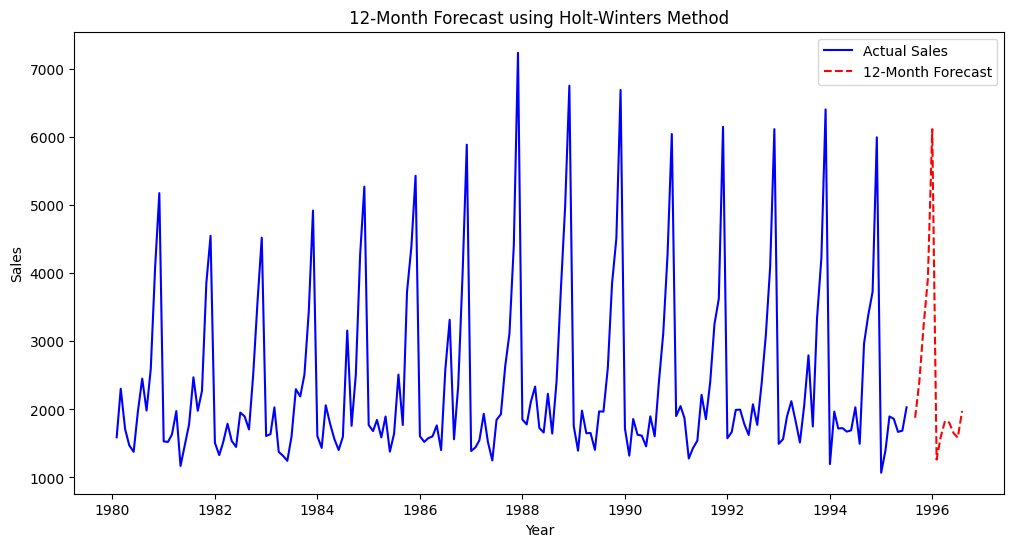

,Date,Forecasted_Sales
1995-08-01,1995-08-31,1877.449309
1995-09-01,1995-09-30,2405.302949
1995-10-01,1995-10-31,3242.123073
1995-11-01,1995-11-30,3922.207178
1995-12-01,1995-12-31,6118.520272
1996-01-01,1996-01-31,1262.648103
1996-02-01,1996-02-29,1592.165606
1996-03-01,1996-03-31,1831.684827
1996-04-01,1996-04-30,1806.507166
1996-05-01,1996-05-31,1651.766662


In [447]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Rebuilding the Holt-Winters model using the entire dataset
best_model = ExponentialSmoothing(
    da['Sparkling_Sales'],  # Replace with actual column name
    trend='add',
    seasonal='add',
    seasonal_periods=12
).fit()

# Forecast the next 12 months
forecast_periods = 12
future_forecast = best_model.forecast(steps=forecast_periods)

# Create a date range for the forecast
future_dates = pd.date_range(start=da.index[-1], periods=forecast_periods + 1, freq='M')[1:]

# Convert forecast to a DataFrame
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted_Sales': future_forecast})

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(da.index, da['Sparkling_Sales'], label="Actual Sales", color="blue")
plt.plot(forecast_df['Date'], forecast_df['Forecasted_Sales'], label="12-Month Forecast", color="red", linestyle="dashed")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("12-Month Forecast using Holt-Winters Method")
plt.legend()
plt.show()

# Display forecasted values
forecast_df
